# DSCI 100 Term Project
- name: Geoff Acabado
- student number: 59285189

## Familiarization
For this project, we will be looking how does different player characteristics correlate to thir probability of being subscribed to a game news paper.

In [7]:
#Some libraries to install
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



### Tidying the data

In [8]:
# install the data needed
player_data = read_csv("players.csv")
player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


### Data explorations

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


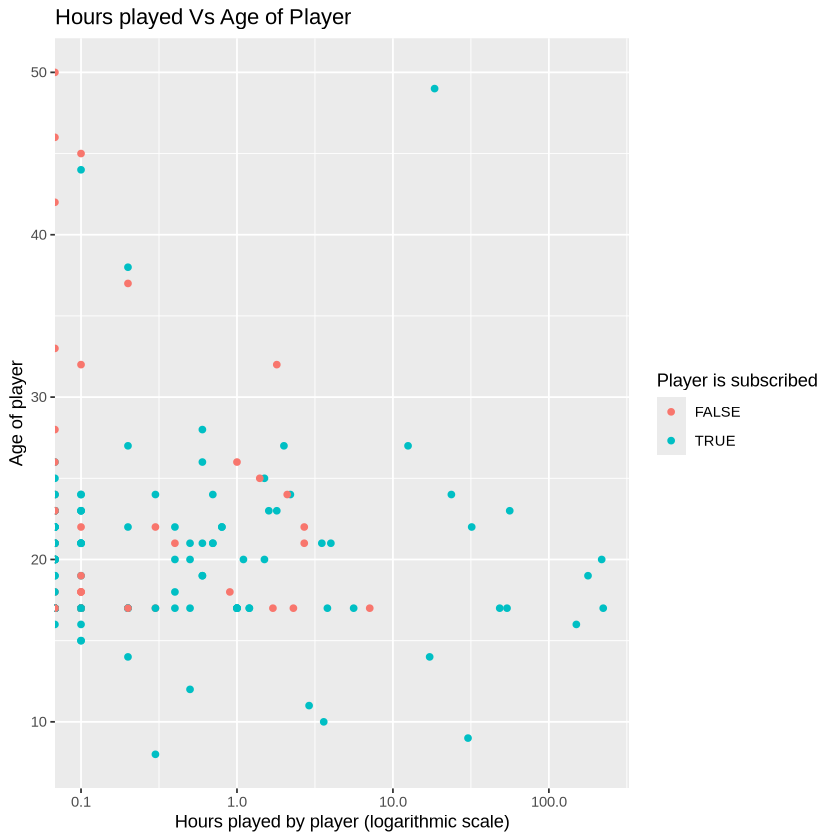

In [22]:
#Lets explore relationships between hours played, age and whether they are subscibed to game newspaper
player_plot_1 = player_data |>
    ggplot(aes(x = played_hours	, y = Age, color = subscribe)) +
    geom_point() +
    scale_x_log10() +
    labs(
        title = "Hours played Vs Age of Player",
        x = "Hours played by player (logarithmic scale)",
        y = "Age of player",
        colour = "Player is subscribed" )
player_plot_1

#### Figure 1.1 
From the figure above, it is easy to see that there are no obvious pattern between between hours played by the player and their age. Both variables also do not seem to be correlated with whether the players are subscribed or not. It is intersting to see however that everyone who played for 10 hours or more are all subscribed to a game newspaper. Another observation we see is that most players are arround 20 years old indicating that this is minecraft is popular among this demographic

### Data Analysis Plan

- Build a classification model that lets us categorize a player according to whether or not they are subscribed in a gaming newspaper
- Use their hours played in the game as well as their age as predictors
- Split the data into training and testing data
- Use a k-nn algorythm with a 5 fold cross validation to verify what the best K-value should be. 
- A K value that will give highest accuracy when used on testing data will be used to build the final model
- Use different metrics such as accuracy, precision, and recall to determine if data is useful in real world

### Model Tuning

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 27 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 27.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 26 rows.
               ✖ Assigned data has 27 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 27 to size 26.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

There were issues with some computations   A: x1   B: x1





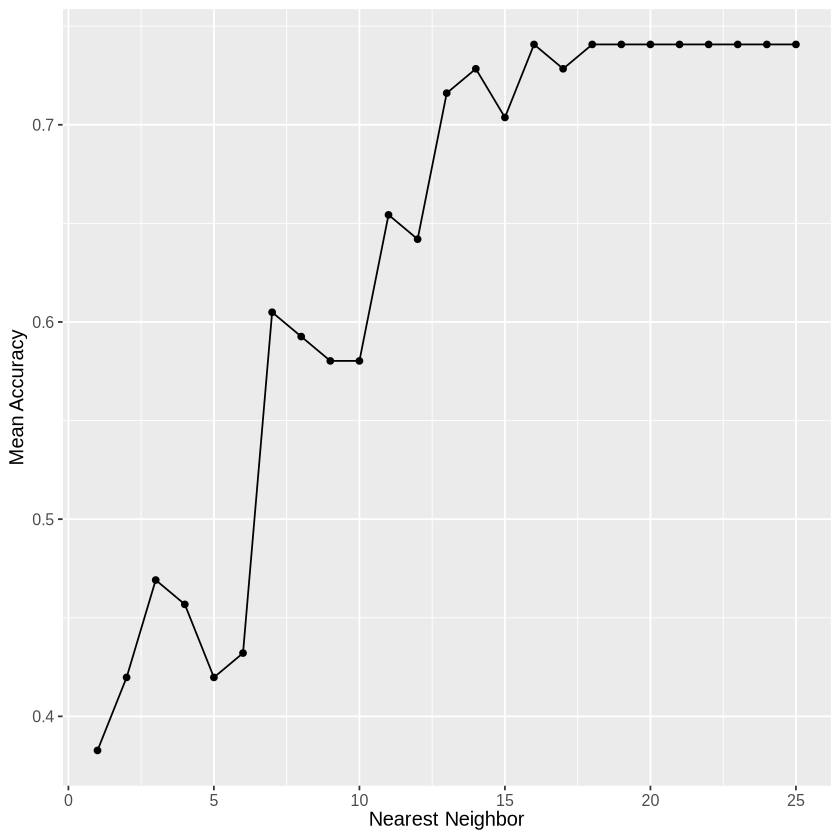

In [20]:
# Clean up data
player_data_clean = player_data |>
    select(subscribe, played_hours, Age) |>
    mutate(subscribe = as.factor(subscribe))

#split the data
player_data_split = initial_split(player_data_clean, prop = 0.7, strata = subscribe)
player_data_training = training(player_data_split)
player_data_testing = testing(player_data_split)

# Tuning the model with 5 fold cross validation
player_data_vfold = vfold_cv(player_data_training, v = 5, strata = subscribe)

#make recipe
player_data_recipe = recipe(subscribe ~., data = player_data_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

#Tune model
knn_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

#Get results
k_vals = tibble(neighbors = 1:25)
knn_results = workflow() |>
    add_recipe(player_data_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = player_data_vfold, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

knn_results_plot = knn_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Nearest Neighbor" , y = "Mean Accuracy")+
    theme(text = element_text(size  = 12))
knn_results_plot

### Improvements 

### Conclusions